# Load Packages

In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

# Load Data Points (Do not modify the following block)

We have 15 number of data
Coefficients of the original polynomial
w0:-0.467  w1:-0.005  w2:0.281  w3:-0.054  


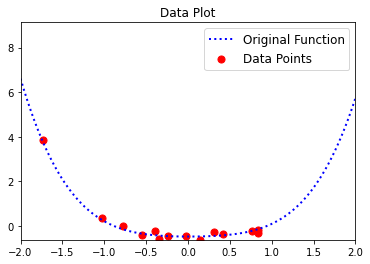

In [2]:
with open('training_data.npz', 'rb') as f:
    data = np.load(f)

    x_list = data['x_list']
    y_list = data['y_list']

    x_data = data['x_data']
    y_data = data['y_data']
    n_data = len(x_data)
    
    w = data['w']
    original_degree = data['order']
    
# Print information of original function.
print("=================================")
print("We have", n_data, "number of data")

print("=================================")
weight_info_string = ''
for d in range(original_degree):
    weight_info_string += 'w'+str(d)+':'+str(round(w[d],ndigits=3))+'  '
print("Coefficients of the original polynomial")
print(weight_info_string)
print("=================================")
    
plt.plot(x_list, y_list, 'b:', linewidth=2, label="Original Function")
plt.scatter(x_data, y_data, s=50, c='r', label="Data Points")
plt.xlim([np.min(x_list),np.max(x_list)])
plt.ylim([np.min(y_data),np.max(y_data)])
plt.legend(prop={'size': 12})
plt.title("Data Plot")
plt.show()

# Polynomial Regression (Programming Assignment)
### Variable Explanation (Do not change variable names)
- 'w' is true coefficients of the original polynomial function
- 'original_degree' is the order of the original polynomial function
- 'x_list' is a list of the points at $x$-axis
- 'y_list' is a list of function value $f(x)$ corresponding to 'x_list'. In other words, y_list = $f($x_list$)$
- 'x_data' is an input data
- 'y_data' is an output data
- 'n_data' is the number of data points

### Our goal is to estimate 'w' from data points, 'x_data' and 'y_data'. Answer the following problems.

### 1. Compute a Vandermonde matrix when the degree of polynomial is $4$ (30pt)
- The variable 'degree' is the order of polynomial. In this problem, we set degree=$4$
- Use the variable 'A' for the Vandermonde matrix. Now, 'A' is initialized as a zero matrix whose elements are all zero. Fill in the element of the Vandermonde matrix by using power operator (\*\*), for loop, and np.concatenation.

In [3]:
degree = 4
n_list = len(x_list)
A = np.zeros((n_list, degree+1)) 

for i in range(0, len(x_list)):
    A[i][0] = 1
    A[i][1] = pow(x_list[i], 1)
    A[i][2] = pow(x_list[i], 2)
    A[i][3] = pow(x_list[i], 3)
    A[i][4] = pow(x_list[i], 4)
#print(A,"\n",x_data, '\n', x_list)
#print(A)# Dummy initialization
#A = np.vander(x_data, degree, increasing=True)
# A는 np.vander(x_data, degree+1)과 같다(단 increasing이 반대)


### Print results (do not modify the following block)

In [4]:
print(A)
print(A.shape)



[[ 1.00000000e+00 -2.00000000e+00  4.00000000e+00 -8.00000000e+00
   1.60000000e+01]
 [ 1.00000000e+00 -1.95959596e+00  3.84001632e+00 -7.52488047e+00
   1.47457254e+01]
 [ 1.00000000e+00 -1.91919192e+00  3.68329762e+00 -7.06895503e+00
   1.35666814e+01]
 [ 1.00000000e+00 -1.87878788e+00  3.52984389e+00 -6.63182792e+00
   1.24597979e+01]
 [ 1.00000000e+00 -1.83838384e+00  3.37965514e+00 -6.21310338e+00
   1.14220688e+01]
 [ 1.00000000e+00 -1.79797980e+00  3.23273135e+00 -5.81238567e+00
   1.04505520e+01]
 [ 1.00000000e+00 -1.75757576e+00  3.08907254e+00 -5.42927902e+00
   9.54236918e+00]
 [ 1.00000000e+00 -1.71717172e+00  2.94867871e+00 -5.06338768e+00
   8.69470611e+00]
 [ 1.00000000e+00 -1.67676768e+00  2.81154984e+00 -4.71431590e+00
   7.90481251e+00]
 [ 1.00000000e+00 -1.63636364e+00  2.67768595e+00 -4.38166792e+00
   7.17000205e+00]
 [ 1.00000000e+00 -1.59595960e+00  2.54708703e+00 -4.06504799e+00
   6.48765235e+00]
 [ 1.00000000e+00 -1.55555556e+00  2.41975309e+00 -3.76406036e+00

### 2. Compute the coefficients of polynomial regression using a $4$ degree polynomial  (40pt)
- Use the variable 'degree' and the Vandermonde matrix 'A' in Problem 1.
- The variable 'w_est' is the coefficients of polynomial regression. Now, 'w_est' is initialized as a zero vector. Compute the 'w_est' from 'A' and 'y'
- The variable 'y_est' is an estimated function value corresponding to the input points 'x_list'. Now, it is a zero list and fill the list by computing the estimated function values. In other words, y_est = $\hat{f}($x_list$)$

In [5]:
import numpy.linalg as lin
#print(A.shape , "\n")
B = lin.pinv(A)
#rint(A)
#rint()
#rint(B)
#print(B.shape, "\n")
#print(Y.shape)

w_est = np.matmul(B, y_list)
#w_est = np.zeros((degree+1,1))
#y_est = np.zeros_like(x_list)
#print(x_data)
#print(w_est)
y_est = np.matmul(A, w_est)
#print("\n\n",y_est)


### Print results (do not modify the following block)

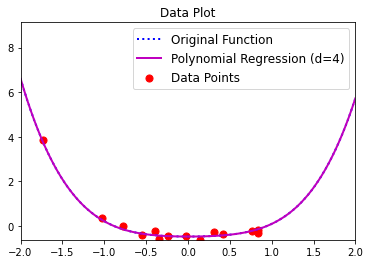

In [6]:
plt.plot(x_list, y_list, 'b:', linewidth=2, label="Original Function")
plt.plot(x_list, y_est, 'm-', linewidth=2, label="Polynomial Regression (d={})".format(degree))
plt.scatter(x_data, y_data, s=50, c='r', label="Data Points")
plt.xlim([np.min(x_list),np.max(x_list)])
plt.ylim([np.min(y_data),np.max(y_data)])
plt.legend(prop={'size': 12})
plt.title("Data Plot")
plt.show()

### 3. Compute the polynomial regression with $1$ degree polynomials (15pt)
- Repeat Problem 1 and Problem 2 with degree $1$.
- Use the following variables.
> degree1, A1, w_est1, y_est1

In [7]:
degree1 = 1
A1 = np.zeros((n_list, degree1+1))
for i in range(0, len(x_list)):
    A1[i][0] = 1
    A1[i][1] = pow(x_list[i], 1)
B1 = lin.pinv(A1)
w_est1 = np.matmul(B1, y_list)
#print(A1.shape)
#print(B1.shape)
#print(y_list.shape)

y_est1 = np.matmul(A1, w_est1)
#print("\n\n", y_est1)

### Print results (do not modify the following block)

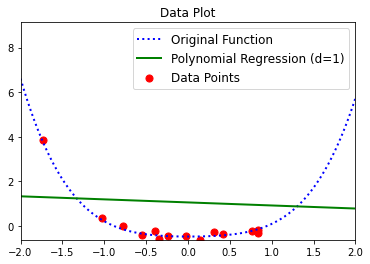

In [8]:
plt.plot(x_list, y_list, 'b:', linewidth=2, label="Original Function")
plt.plot(x_list, y_est1, 'g-', linewidth=2, label="Polynomial Regression (d={})".format(degree1))
plt.scatter(x_data, y_data, s=50, c='r', label="Data Points")
plt.xlim([np.min(x_list),np.max(x_list)])
plt.ylim([np.min(y_data),np.max(y_data)])
plt.legend(prop={'size': 12})
plt.title("Data Plot")
plt.show()

### 4. Compute the polynomial regression with $10$ degree polynomials (15pt)
- Repeat Problem 1 and Problem 2 with degree $10$.
- Use the following variables.
> degree2, A2, w_est2, y_est2

In [9]:
degree2 = 10
np.set_printoptions(threshold=np.inf, linewidth=np.inf)
A2 = np.zeros((n_list, degree2+1))
#print(A2)
#print(A2.shape)
for i in range(0, len(x_list)):
    for j in range(0, degree2+1):
        A2[i][j] = pow(x_list[i], j)
#print(A2)
print(A2.shape)

B2 = lin.pinv(A2)
w_est2 = np.matmul(B2, y_list)
print(B2.shape)

y_est2 = np.matmul(A2, w_est2)
print("\n\n ", y_est2)
print(y_est.shape)



(100, 11)
(11, 100)


  [ 6.60941242  6.10665925  5.63176719  5.18365754  4.76127362  4.36358081  3.98956648  3.63824006  3.30863299  2.99979876  2.71081288  2.44077289  2.18879837  1.95403092  1.73563417  1.5327938   1.34471749  1.17063497  1.00979801  0.86148038  0.72497792  0.59960846  0.48471189  0.37965013  0.2838071   0.19658879  0.1174232   0.04576036 -0.01892766 -0.07714676 -0.12938083 -0.1760917  -0.21771919 -0.25468107 -0.28737311 -0.31616901 -0.34142047 -0.36345715 -0.38258667 -0.39909463 -0.41324461 -0.42527813 -0.4354147  -0.44385179 -0.45076485 -0.45630729 -0.4606105  -0.46378382 -0.46591458 -0.46706806 -0.46728754 -0.46659422 -0.46498732 -0.462444   -0.4589194  -0.45434661 -0.44863673 -0.44167879 -0.43333981 -0.42346476 -0.41187661 -0.39837627 -0.38274264 -0.36473257 -0.3440809  -0.32050041 -0.29368189 -0.26329407 -0.22898366 -0.19037532 -0.14707171 -0.09865345 -0.0446791   0.01531476  0.08181362  0.15532499  0.23637841  0.32552545  0.4233397   0.5304168   0.64737441  0.

### Print results (do not modify the following block)

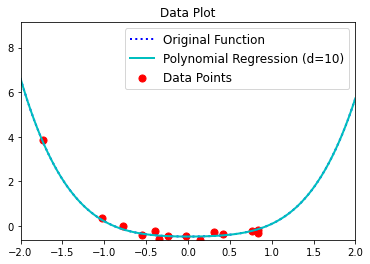

In [10]:
plt.plot(x_list, y_list, 'b:', linewidth=2, label="Original Function")
plt.plot(x_list, y_est2, 'c-', linewidth=2, label="Polynomial Regression (d={})".format(degree2))
plt.scatter(x_data, y_data, s=50, c='r', label="Data Points")
plt.xlim([np.min(x_list),np.max(x_list)])
plt.ylim([np.min(y_data),np.max(y_data)])
plt.legend(prop={'size': 12})
plt.title("Data Plot")
plt.show()

### 5. [Challenging Problem] Explain the effect of degree (20pt)
- By solving the above problems, we can observe the behaviors of polynomial regression with different degrees (1, 4, 10)
- Explain pros and cons of high degree polynomial
- Explain pros and cons of low degree polynomial
- What is this phenomenon called in machine learning?

In [12]:
print(" 1. high degree polynomial의 경우 low bias의 특징 즉, 주어진 데이터를 잘 설명할 수 있다")
print("그러나 high variance의 특징 즉, 새로운 데이터가 들어왔을 때 완전히 다른 형태로 변할 것이다")
print()
print(" 2. low degree polynomial의 경우 high bias의 특징 즉, 데이터의 모든 정보를 고려하지 못한다는 단점을 가진다")
print("그러나 low variance의 특징 즉, 새로운 데이터가 들어와도 모델의 형태가 크게 변하지 않는다는 장점을 지닌다")
print()
print(" 이런 현상을 bias-variance trade-off라 부른다")

 1. high degree polynomial의 경우 low bias의 특징 즉, 주어진 데이터를 잘 설명할 수 있다
그러나 high variance의 특징 즉, 새로운 데이터가 들어왔을 때 완전히 다른 형태로 변할 것이다

 2. low degree polynomial의 경우 high bias의 특징 즉, 데이터의 모든 정보를 고려하지 못한다는 단점을 가진다
그러나 low variance의 특징 즉, 새로운 데이터가 들어와도 모델의 형태가 크게 변하지 않는다는 장점을 지닌다

 이런 현상을 bias-variance trade-off라 부른다


### The following figure shows all regression results with different degrees.

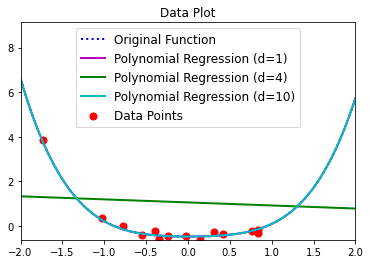

In [11]:
plt.plot(x_list, y_list, 'b:', linewidth=2, label="Original Function")
plt.plot(x_list, y_est, 'm-', linewidth=2, label="Polynomial Regression (d={})".format(1))
plt.plot(x_list, y_est1, 'g-', linewidth=2, label="Polynomial Regression (d={})".format(4))
plt.plot(x_list, y_est2, 'c-', linewidth=2, label="Polynomial Regression (d={})".format(10))
plt.scatter(x_data, y_data, s=50, c='r', label="Data Points")
plt.xlim([np.min(x_list),np.max(x_list)])
plt.ylim([np.min(y_data),np.max(y_data)])
plt.legend(prop={'size': 12})
plt.title("Data Plot")
plt.show()

Write your answer!!!